Importing library, loading data file and checking for null values

In [1]:
import pandas as pd

In [2]:
df_sales = pd.read_csv('C:/Users/galea/Downloads/2022/Dissertation/Dissertation/Data/Derma_Sales_Data.csv', delimiter=',', header='infer', encoding='latin-1')

After the data is loaded, the first 5 records are printed.

In [3]:
df_sales.head(5)

,Data entry date,Pharmacy,Year,Month,Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Sales Rep,Code,Location
0,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,2,Dr Josevania Martins,Dr Vania Healthcare,NW3,blank,NW,4
1,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,1,Dr Josevania Martins,Dr Vania Healthcare,NW3,blank,NW,4
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin EV,1,NaN,NaN,HA8,blank,HA,5
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin FL,1,NaN,NaN,HA8,blank,HA,5
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Viscoderm Trio,4,NaN,NaN,PE21,Rachel,PE,2


Here we check for null values, get the totals for nulls according to columns, and print the results of null values

In [4]:
df_sales.isnull().sum()

Data entry date        0
Pharmacy               0
Year                   0
Month                  0
Quarter                0
Product                0
Qty                    0
Cust.Name          10390
Comp.Name          10390
Area Code              0
Sales Rep              0
Code                  43
Location               0
dtype: int64

In [5]:
df_sales[df_sales.isnull().any(axis=1)]

,Data entry date,Pharmacy,Year,Month,Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Sales Rep,Code,Location
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin EV,1,NaN,NaN,HA8,blank,HA,5
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin FL,1,NaN,NaN,HA8,blank,HA,5
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Viscoderm Trio,4,NaN,NaN,PE21,Rachel,PE,2
8,19/10/2018,Church Pharmacy,2015,Dec-15,15-Q4,Aliaxin EV,1,NaN,NaN,NW3,blank,NW,4
9,19/10/2018,Church Pharmacy,2015,Dec-15,15-Q4,Aliaxin FL,1,NaN,NaN,SR3,Heather,SR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68300,13/05/2022,John Bannon - Ireland,2022,Mar-22,22-Q1,Profhilo,18,Cosaint Skincare Ireland Ltd,Cosaint Skincare Ireland Ltd,0,blank,NaN,0
68308,13/05/2022,John Bannon - Ireland,2022,Mar-22,22-Q1,Profhilo,8,Eos Clinic (Skin Cosmetic Clinic),Eos Clinic (Skin Cosmetic Clinic),0,blank,NaN,0
68316,13/05/2022,John Bannon - Ireland,2022,Mar-22,22-Q1,Profhilo,2,Nicola Fagan,Nicola Fagan,0,blank,NaN,0
68317,13/05/2022,John Bannon - Ireland,2022,Mar-22,22-Q1,Profhilo,2,Chloe Hughes,Chloe Hughes,0,blank,NaN,0


Sales Rep column is not needed in this research, so we drop the column in the notebook only

In [6]:
df_sales.drop('Sales Rep', axis=1, inplace=True)

In [7]:
df_sales.head(5)

,Data entry date,Pharmacy,Year,Month,Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Code,Location
0,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,2,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,4
1,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,1,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,4
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin EV,1,NaN,NaN,HA8,HA,5
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin FL,1,NaN,NaN,HA8,HA,5
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Viscoderm Trio,4,NaN,NaN,PE21,PE,2


Here we need to create a new column which will store in it the month from the old month column

In [8]:
#df_sales['Date']= pd.to_datetime(df_sales['Month'], errors='ignore', format='%d%m%Y')
new = df_sales["Month"].str.split("-", n = 1, expand = True)
df_sales["NewMonth"]= new[0]
 
df_sales.rename(columns = {'Month':'Month-Year'}, inplace = True)
df_sales.rename(columns = {'NewMonth':'Month'}, inplace = True)
df_sales.head(5)

,Data entry date,Pharmacy,Year,Month-Year,Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Code,Location,Month
0,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,2,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,4,Nov
1,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,1,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,4,Nov
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin EV,1,NaN,NaN,HA8,HA,5,Nov
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin FL,1,NaN,NaN,HA8,HA,5,Nov
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Viscoderm Trio,4,NaN,NaN,PE21,PE,2,Nov


Here we get the unique values of the Month column to confirm that the months are correct. After we replace the month with a number instead of text.

In [9]:
print(df_sales['Month'].unique())

['Nov' 'Dec' 'Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct']


In [10]:
df_sales['Month'].replace(to_replace = "Jan", 
                 value = 1, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Feb", 
                 value = 2, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Mar", 
                 value = 3, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Apr", 
                 value = 4, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "May", 
                 value = 5, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Jun", 
                 value = 6, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Jul", 
                 value = 7, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Aug", 
                 value = 8, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Sep", 
                 value = 9, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Oct", 
                 value = 10, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Nov", 
                 value = 11, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Dec", 
                 value = 12, 
                  inplace = True)

A new column needs to be added to hold the full date of sale using the Month and Year column

In [11]:
df_sales =  df_sales.astype({'Year':'str'})
df_sales =  df_sales.astype({'Month':'str'})
df_sales['Date']= "1" + '-' + df_sales['Month'] + '-' + df_sales['Year']
df_sales.head()

,Data entry date,Pharmacy,Year,Month-Year,Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Code,Location,Month,Date
0,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,2,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,4,11,1-11-2015
1,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,1,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,4,11,1-11-2015
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin EV,1,NaN,NaN,HA8,HA,5,11,1-11-2015
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin FL,1,NaN,NaN,HA8,HA,5,11,1-11-2015
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Viscoderm Trio,4,NaN,NaN,PE21,PE,2,11,1-11-2015


Here we need to create a new column which will store in it the quarter from the old quarter column

In [12]:
new = df_sales["Quarter"].str.split("-", n = 1, expand = True)
df_sales["NewQuarter"]= new[1]
 
df_sales.rename(columns = {'Quarter':'Year-Quarter'}, inplace = True)
df_sales.rename(columns = {'NewQuarter':'Quarter'}, inplace = True)
df_sales.head(5)

,Data entry date,Pharmacy,Year,Month-Year,Year-Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Code,Location,Month,Date,Quarter
0,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,2,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,4,11,1-11-2015,Q4
1,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,1,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,4,11,1-11-2015,Q4
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin EV,1,NaN,NaN,HA8,HA,5,11,1-11-2015,Q4
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin FL,1,NaN,NaN,HA8,HA,5,11,1-11-2015,Q4
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Viscoderm Trio,4,NaN,NaN,PE21,PE,2,11,1-11-2015,Q4


Here, the unique location codes are found, for each number, we replace the code with the real location

In [13]:
print(df_sales['Location'].unique())

[4 5 2 1 3 7 8 6 0 9]


In [14]:
df_sales['Location'].replace(to_replace = 0, 
                 value = "Brazil, USA, Blank, IE, Zimbabwe, Zurich", 
                  inplace = True)
df_sales['Location'].replace(to_replace = 1, 
                 value = "Scotland, Newcastle", 
                  inplace = True)
df_sales['Location'].replace(to_replace = 2, 
                 value = "NorthEast, Midlands", 
                  inplace = True)
df_sales['Location'].replace(to_replace = 3, 
                 value = "NorthWest", 
                  inplace = True)
df_sales['Location'].replace(to_replace = 4, 
                 value = "London", 
                  inplace = True)
df_sales['Location'].replace(to_replace = 5, 
                 value = "Outside London M25", 
                  inplace = True)
df_sales['Location'].replace(to_replace = 6, 
                 value = "Outside London the rest", 
                  inplace = True)
df_sales['Location'].replace(to_replace = 7, 
                 value = "SouthEast", 
                  inplace = True)
df_sales['Location'].replace(to_replace = 8, 
                 value = "SouthWest", 
                  inplace = True)
df_sales['Location'].replace(to_replace = 9, 
                 value = "Ireland & Northern Ireland", 
                  inplace = True)
df_sales.head()

,Data entry date,Pharmacy,Year,Month-Year,Year-Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Code,Location,Month,Date,Quarter
0,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,2,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,London,11,1-11-2015,Q4
1,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,1,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,London,11,1-11-2015,Q4
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin EV,1,NaN,NaN,HA8,HA,Outside London M25,11,1-11-2015,Q4
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin FL,1,NaN,NaN,HA8,HA,Outside London M25,11,1-11-2015,Q4
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Viscoderm Trio,4,NaN,NaN,PE21,PE,"NorthEast, Midlands",11,1-11-2015,Q4


In [15]:
df_sales.head()

,Data entry date,Pharmacy,Year,Month-Year,Year-Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Code,Location,Month,Date,Quarter
0,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,2,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,London,11,1-11-2015,Q4
1,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,1,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,London,11,1-11-2015,Q4
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin EV,1,NaN,NaN,HA8,HA,Outside London M25,11,1-11-2015,Q4
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin FL,1,NaN,NaN,HA8,HA,Outside London M25,11,1-11-2015,Q4
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Viscoderm Trio,4,NaN,NaN,PE21,PE,"NorthEast, Midlands",11,1-11-2015,Q4


In [16]:
df_sales['Category'] = df_sales.loc[:, 'Product']

In [17]:
df_sales.head()

,Data entry date,Pharmacy,Year,Month-Year,Year-Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Code,Location,Month,Date,Quarter,Category
0,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,2,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,London,11,1-11-2015,Q4,Viscoderm Trio
1,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,1,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,London,11,1-11-2015,Q4,Viscoderm Trio
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin EV,1,NaN,NaN,HA8,HA,Outside London M25,11,1-11-2015,Q4,Aliaxin EV
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin FL,1,NaN,NaN,HA8,HA,Outside London M25,11,1-11-2015,Q4,Aliaxin FL
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Viscoderm Trio,4,NaN,NaN,PE21,PE,"NorthEast, Midlands",11,1-11-2015,Q4,Viscoderm Trio


In [18]:
dictCategory = {"Aliaxin EV" : 'Dermafiller', 
                "ALIAXIN EV" : 'Dermafiller', 
                "Aliaxin FL" : 'Dermafiller', 
                "ALIAXIN FL" : 'Dermafiller', 
                "Aliaxin GP" : 'Dermafiller', 
                "Aliaxin LV" : 'Dermafiller',
                "Aliaxin SR" : 'Dermafiller',
                "ALIAXIN SR" : 'Dermafiller',
                "Aliaxin SV" : 'Dermafiller',
                "Hydrobooster Needle Box" : 'Needles', 
                "Profhilo" : 'Profilho', 
                "Profhilo Body Kit" : 'Profilho',
                "Profhilo Cream" : 'Skincare',
                "Profhilo Haenkenium" : 'Skincare',
                "Profhilo Pura" : 'Skincare',
                "Viscoderm" : 'Skinbooster',
                "Viscoderm Bi" : 'Skinbooster',
                "Viscoderm Cover Up Dark" : 'Skincare',
                "Viscoderm Cover Up Light" : 'Skincare',
                "Viscoderm Cover Up light" : 'Skincare',
                "Viscoderm Cream" : 'Skincare',
                "Viscoderm Hydrobooster" : 'Skinbooster',
                "Viscoderm Hydrobooster Cream" : 'Skincare',
                "Viscoderm Hydrogel Patch" : 'Skincare',
                "Viscoderm Maxx" : 'Skinbooster',
                "Viscoderm Pearls" : 'Skincare',
                "Viscoderm Skinko" : 'Mesotherapy',
                "Viscoderm Skinko E" : 'Mesotherapy',
                "Viscoderm Skinko Kit" : 'Needles',
                "Viscoderm SPF 50" : 'Skincare',
                "Viscoderm Trio" : 'Skinbooster'}
df_sales.replace({"Category": dictCategory},inplace=True)
df_sales.head()

,Data entry date,Pharmacy,Year,Month-Year,Year-Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Code,Location,Month,Date,Quarter,Category
0,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,2,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,London,11,1-11-2015,Q4,Skinbooster
1,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,1,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,London,11,1-11-2015,Q4,Skinbooster
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin EV,1,NaN,NaN,HA8,HA,Outside London M25,11,1-11-2015,Q4,Dermafiller
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin FL,1,NaN,NaN,HA8,HA,Outside London M25,11,1-11-2015,Q4,Dermafiller
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Viscoderm Trio,4,NaN,NaN,PE21,PE,"NorthEast, Midlands",11,1-11-2015,Q4,Skinbooster


The unique product names are found, replaced with a generic name and assigned a category

In [19]:
print(df_sales['Product'].unique())

['Viscoderm Trio' 'Aliaxin EV' 'Aliaxin FL' 'Aliaxin GP' 'Aliaxin SR'
 'Viscoderm Skinko E' 'Viscoderm Skinko Kit' 'Viscoderm Cover Up Light'
 'Viscoderm Hydrogel Patch' 'Viscoderm Bi' 'Viscoderm Maxx' 'Profhilo'
 'Viscoderm Skinko' 'Viscoderm Cover Up Dark' 'Viscoderm Cover Up light'
 'Viscoderm Pearls' 'Viscoderm SPF 50' 'Viscoderm Cream'
 'Profhilo Haenkenium' 'Viscoderm Hydrobooster' 'Hydrobooster Needle Box'
 'Viscoderm' 'Aliaxin SV' 'ALIAXIN EV' 'ALIAXIN FL' 'ALIAXIN SR'
 'Aliaxin LV' 'Profhilo Cream' 'Profhilo Pura'
 'Viscoderm Hydrobooster Cream' 'Profhilo Body Kit']


In [20]:
df_sales['Product'].replace(to_replace =["Aliaxin EV", "ALIAXIN EV"], 
                 value = "Injection 1", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Aliaxin FL", "ALIAXIN FL"], 
                 value = "Injection 2", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Aliaxin GP"], 
                 value = "Injection 3", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Aliaxin LV"], 
                 value = "Injection 4", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Aliaxin SR", "ALIAXIN SR"], 
                 value = "Injection 5", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Aliaxin SV"], 
                 value = "Injection 6", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Hydrobooster Needle Box"], 
                 value = "Skin Booster Needles", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Profhilo"], 
                 value = "Injection 7", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Profhilo Body Kit"], 
                 value = "Injection 8", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Profhilo Cream"], 
                 value = "Cream 1", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Profhilo Haenkenium"], 
                 value = "Cream 2", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Profhilo Pura"], 
                 value = "Make-up Remover", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm", "Viscoderm Bi"], 
                 value = "Injection 9", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Cover Up Dark"], 
                 value = "Foundation 1", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Cover Up Light", "Viscoderm Cover Up light"], 
                 value = "Foundation 2", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Cream"], 
                 value = "Cream 3", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Hydrobooster"], 
                 value = "Injection 10", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Hydrobooster Cream"], 
                 value = "Cream 4", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Hydrogel Patch"], 
                 value = "Facemask", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Maxx"], 
                 value = "Injection 11", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Pearls"], 
                 value = "Pills", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Skinko"], 
                 value = "Injection 12", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Skinko E"], 
                 value = "Injection 13", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Skinko Kit"], 
                 value = "Mesotherapy Needles", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm SPF 50"], 
                 value = "sunblock", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Trio"], 
                 value = "Injection 14", 
                  inplace = True)


In [21]:
df_sales.head(50)

,Data entry date,Pharmacy,Year,Month-Year,Year-Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Code,Location,Month,Date,Quarter,Category
0,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Injection 14,2,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,London,11,1-11-2015,Q4,Skinbooster
1,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Injection 14,1,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,London,11,1-11-2015,Q4,Skinbooster
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Injection 1,1,NaN,NaN,HA8,HA,Outside London M25,11,1-11-2015,Q4,Dermafiller
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Injection 2,1,NaN,NaN,HA8,HA,Outside London M25,11,1-11-2015,Q4,Dermafiller
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Injection 14,4,NaN,NaN,PE21,PE,"NorthEast, Midlands",11,1-11-2015,Q4,Skinbooster
5,23/06/2019,Direct Sales,2015,Dec-15,15-Q4,Injection 3,8,Dr Andrew Culbard,Dr Andrew Culbard,G12,G,"Scotland, Newcastle",12,1-12-2015,Q4,Dermafiller
6,23/06/2019,Direct Sales,2015,Dec-15,15-Q4,Injection 2,4,Dr Andrew Culbard,Dr Andrew Culbard,G12,G,"Scotland, Newcastle",12,1-12-2015,Q4,Dermafiller
7,23/06/2019,Direct Sales,2015,Dec-15,15-Q4,Injection 1,8,Dr Andrew Culbard,Dr Andrew Culbard,G12,G,"Scotland, Newcastle",12,1-12-2015,Q4,Dermafiller
8,19/10/2018,Church Pharmacy,2015,Dec-15,15-Q4,Injection 1,1,NaN,NaN,NW3,NW,London,12,1-12-2015,Q4,Dermafiller
9,19/10/2018,Church Pharmacy,2015,Dec-15,15-Q4,Injection 2,1,NaN,NaN,SR3,SR,"Scotland, Newcastle",12,1-12-2015,Q4,Dermafiller


The unique customer names are found, stored in a csv and renamed with a generic name

In [22]:
df_sales['Cust.Name'] = df_sales['Cust.Name'].str.lower()
df_sales['Cust.Name'] = df_sales['Cust.Name'].str.title()
print(df_sales['Cust.Name'].unique())
custName = df_sales['Cust.Name'].unique()

['Dr Josevania Martins' nan 'Dr Andrew Culbard' ... 'Dr Sunita De Zoysa'
 'Pro Beauty Ltd' 'Dr Kiran Juneja']


In [23]:
#dictOfWordsCust = {("Customer "+ str(i+1)): custName[i] for i in range(0, len(custName) ) }

resultCust = {}
for i in range (0, len(custName)):
    if custName[i]==custName[i]:
        print(custName[i])
        resultCust[custName[i]] = "Customer " + str(i+1)
#print(result)

Dr Josevania Martins
Dr Andrew Culbard
Shad Jeff
Sean Daly
Malti O'Mahony
Dr Thomas Owen
Dr Yuri Michitiuc
Dr Nelson Wan
Dr Navin Aziz
Dr Colin Lyons
Rita Ann Ogden
Kornelia Hauck
Dr Stanimira (Stassi) Stavreva
Dr Pamela Kidd
Dr May Lim Siew Hong
Dr Laura Sivoglo
Dr June Mcneill
Jane Byers
Dr Zunaid Alli
Dr Rupert Critchley
Dr Jonathan Doran
Dr Emma Ravichandran
Camilla Harraway
Fiona Dilazzaro
Dr Ravi Jain
Dr Ramal Premnath
Dr Prem Kumar Gauba
Adriana Sinclair
Tracy Shepherd-Regan
Nicola Hughes
Intravita International Training
Heather Irvine
Dr Rovshan Izamov
Dr Meriem Martins
Dr Jardis Volpe
Dr Gerhard Robbertse
Dr Andre Van Der Merwe
Diane Penny
David Mercer
Christine Simpson
Cheryl Barton
Beverley Brabbins
Yvonne Senior
Wendy Dudley
Picture Perfect Aesthetics Ltd
Lee Garrett
Kathleen Harding
Dr Wiaam Kadhim
Dr Tauqir Ahmad
Dr Sara Akaby
Dr Richard Etok
Dr Faizan Irshad
Deborah Forsythe
Amanda Otto
Sonia Branco
Rosie Cooper
Fiona Collins
Dr Monu Aggarwal
Dr Mohammed Tauqir Ahmad
Dr 

In [24]:
df_sales.replace({'Cust.Name':resultCust}, inplace=True)

In [25]:
import csv

headersCust = ["Customer Name", "Customer Number"]
with open('C:/Users/galea/Downloads/2022/Dissertation/Dissertation/Data/CustomerNames.csv', 'w', encoding="utf-8", newline='') as f:

# writing the data into the file
   writer = csv.writer(f)
   writer.writerow(headersCust)
   writer.writerows(resultCust.items())

The unique company names are found, stored in a csv and renamed with a generic name

In [26]:
df_sales['Comp.Name'] = df_sales['Comp.Name'].str.lower()
df_sales['Comp.Name'] = df_sales['Comp.Name'].str.title()
print(df_sales['Comp.Name'].unique())
compName = df_sales['Comp.Name'].unique()

['Dr Vania Healthcare' nan 'Dr Andrew Culbard' ...
 'Symmetria Facial Aesthetics Ltd' 'Hunts Cross Dental Centre'
 'Pro Beauty Ltd']


In [27]:
resultComp = {}
for i in range (0, 10):
    if compName[i]==compName[i]:
        print(compName[i])
        resultComp[compName[i]] = "Company " + str(i+1)
#print(result)


Dr Vania Healthcare
Dr Andrew Culbard
Holytown Dental Surgery
Sean Daly
Harley Street Aesthetics
Wish Dental
Everest Clinic
L & H Care Dentist
Huntly Dental Practice


In [28]:
resultComp = {}
for i in range (0, len(compName)):
    if compName[i]==compName[i]:
        resultComp[compName[i]] = "Company " + str(i+1)
#print(result)


In [29]:
df_sales.replace({'Comp.Name':resultComp}, inplace=True)

In [30]:
#dictOfWordsComp = { ("Company "+ str(i+1)) : compName[i] for i in range(0, len(compName) ) }

In [31]:
headersComp = ["Company Name", "Company Number"]
with open('C:/Users/galea/Downloads/2022/Dissertation/Dissertation/Data/CompanyNames.csv', 'w', encoding="utf-8", newline='') as f:

# writing the data into the file
   writer = csv.writer(f)
   writer.writerow(headersComp)
   writer.writerows(resultComp.items())

In [32]:
df_sales['Pharmacy'] = df_sales['Pharmacy'].str.lower()
df_sales['Pharmacy'] = df_sales['Pharmacy'].str.title()
print(df_sales['Pharmacy'].unique())
pharmacyName = df_sales['Pharmacy'].unique()

['Direct Sales' 'Church Pharmacy' 'Intravita' 'Springpharm' 'Wigmore'
 'Millennium' 'Mediva' 'John Bannon - Ireland' 'Healthxchange Uk'
 'Healthxchange Ireland' 'John Bannon Uk']


In [33]:
resultPharm = {}
for i in range (0, len(pharmacyName)):
    resultPharm[pharmacyName[i]] = "Pharmacy " + str(i+1)
#print(result)

In [34]:
df_sales.replace({'Pharmacy':resultPharm}, inplace=True)

In [35]:
#dictOfWordsPharmacy = { ("Pharmacy "+ str(i+1)) : pharmacyName[i] for i in range(0, len(pharmacyName) ) }

In [36]:
headersPharmacy = ["Pharmacy Name", "Pharmacy Number"]
with open('C:/Users/galea/Downloads/2022/Dissertation/Dissertation/Data/PharmacyNames.csv', 'w', encoding="utf-8", newline='') as f:

# writing the data into the file
   writer = csv.writer(f)
   writer.writerow(headersPharmacy)
   writer.writerows(resultPharm.items())

Remove 
-Data Entry Date
-Month-Year
-Year Quarter

In [37]:
df_sales.head(50)

,Data entry date,Pharmacy,Year,Month-Year,Year-Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Code,Location,Month,Date,Quarter,Category
0,23/06/2019,Pharmacy 1,2015,Nov-15,15-Q4,Injection 14,2,Customer 1,Company 1,NW3,NW,London,11,1-11-2015,Q4,Skinbooster
1,23/06/2019,Pharmacy 1,2015,Nov-15,15-Q4,Injection 14,1,Customer 1,Company 1,NW3,NW,London,11,1-11-2015,Q4,Skinbooster
2,19/10/2018,Pharmacy 2,2015,Nov-15,15-Q4,Injection 1,1,NaN,NaN,HA8,HA,Outside London M25,11,1-11-2015,Q4,Dermafiller
3,19/10/2018,Pharmacy 2,2015,Nov-15,15-Q4,Injection 2,1,NaN,NaN,HA8,HA,Outside London M25,11,1-11-2015,Q4,Dermafiller
4,19/10/2018,Pharmacy 2,2015,Nov-15,15-Q4,Injection 14,4,NaN,NaN,PE21,PE,"NorthEast, Midlands",11,1-11-2015,Q4,Skinbooster
5,23/06/2019,Pharmacy 1,2015,Dec-15,15-Q4,Injection 3,8,Customer 3,Company 3,G12,G,"Scotland, Newcastle",12,1-12-2015,Q4,Dermafiller
6,23/06/2019,Pharmacy 1,2015,Dec-15,15-Q4,Injection 2,4,Customer 3,Company 3,G12,G,"Scotland, Newcastle",12,1-12-2015,Q4,Dermafiller
7,23/06/2019,Pharmacy 1,2015,Dec-15,15-Q4,Injection 1,8,Customer 3,Company 3,G12,G,"Scotland, Newcastle",12,1-12-2015,Q4,Dermafiller
8,19/10/2018,Pharmacy 2,2015,Dec-15,15-Q4,Injection 1,1,NaN,NaN,NW3,NW,London,12,1-12-2015,Q4,Dermafiller
9,19/10/2018,Pharmacy 2,2015,Dec-15,15-Q4,Injection 2,1,NaN,NaN,SR3,SR,"Scotland, Newcastle",12,1-12-2015,Q4,Dermafiller


Text(0.5, 1.0, 'Location Count')

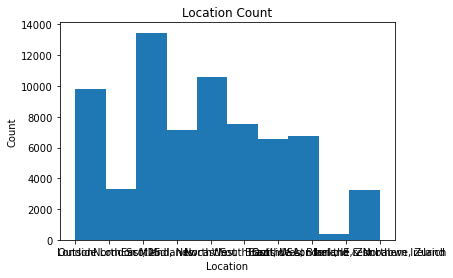

In [38]:
from matplotlib import pyplot as plt

plt.hist(df_sales.Location)
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Location Count")

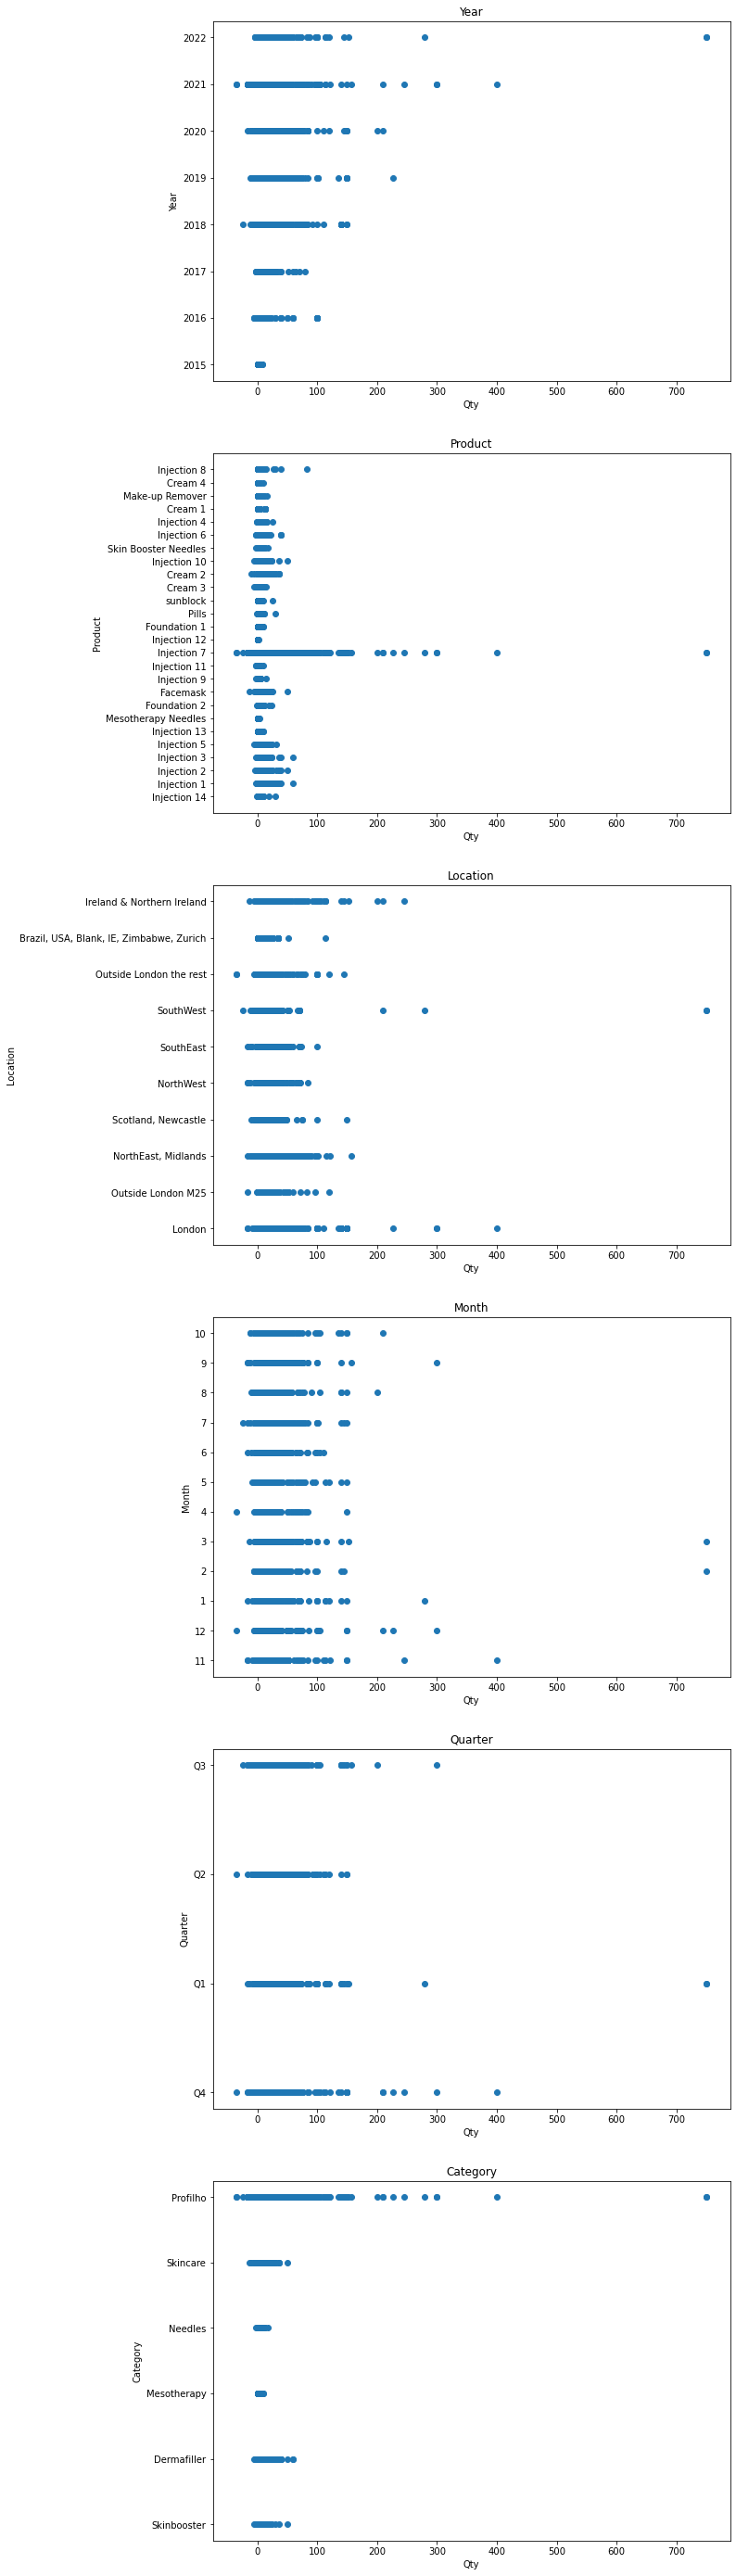

In [39]:
features = ['Year', 'Product', 'Location', 'Month', 'Quarter', 'Category']

fig, ax = plt.subplots(len(features), 1, figsize = (10, 50))

for i in range(0, len(features)):
#for idx, col in enumerate(features, 0):
    ax[i].plot(df_sales['Qty'], df_sales[features[i]], 'o')
    ax[i].set_xlabel('Qty')
    ax[i].set_ylabel(features[i])
    ax[i].set_title(features[i])

plt.show()

The r^2 of Year is 0.00
The r^2 of Product is 0.06
The r^2 of Location is 0.02
The r^2 of Month is 0.00
The r^2 of Quarter is 0.00
The r^2 of Category is 0.05


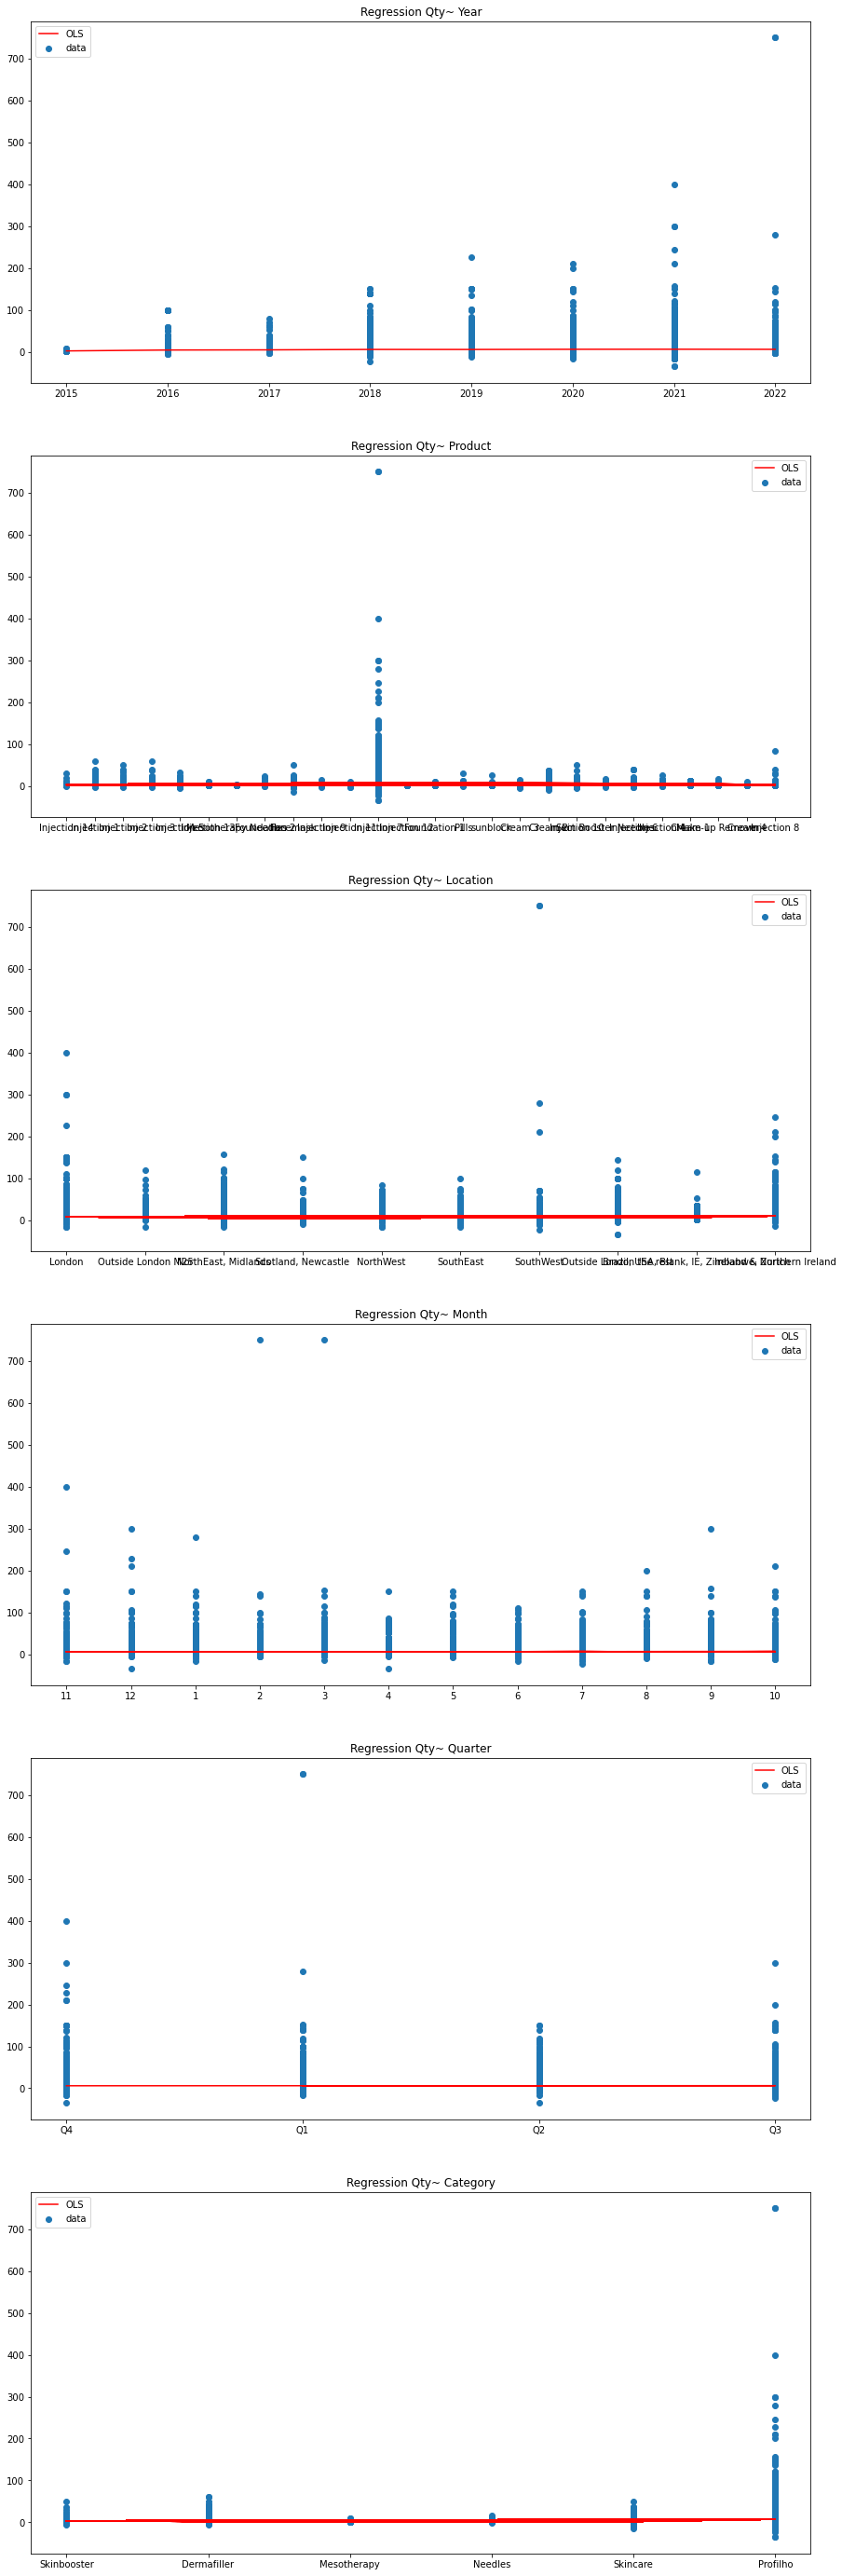

In [40]:
import statsmodels.formula.api as smf

features = ['Year', 'Product', 'Location', 'Month', 'Quarter', 'Category']

fig, ax = plt.subplots(len(features), 1, figsize=(15, 50))

for i in range(0, len(features)):
    model = smf.ols('Qty~'+features[i], df_sales).fit()
    print('The r^2 of {} is {:.2f}'.format(features[i], model.rsquared))
    ax[i].scatter(df_sales[features[i]], df_sales.Qty, label='data')
    ax[i].plot(df_sales[features[i]], model.fittedvalues, color='red', label='OLS')
    ax[i].legend()
    ax[i].set_title('Regression Qty~ '+features[i])

In [41]:
df_sales.dtypes

Data entry date    object
Pharmacy           object
Year               object
Month-Year         object
Year-Quarter       object
Product            object
Qty                 int64
Cust.Name          object
Comp.Name          object
Area Code          object
Code               object
Location           object
Month              object
Date               object
Quarter            object
Category           object
dtype: object

In [42]:
df_sales.Year.unique()

array(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype=object)

In [43]:
df_sales.Year = df_sales.Year.astype(float)

In [44]:
df_sales.Month.unique()
df_sales.Month = df_sales.Month.astype(float)

In [45]:
df_sales.dtypes

Data entry date     object
Pharmacy            object
Year               float64
Month-Year          object
Year-Quarter        object
Product             object
Qty                  int64
Cust.Name           object
Comp.Name           object
Area Code           object
Code                object
Location            object
Month              float64
Date                object
Quarter             object
Category            object
dtype: object

In [46]:
formula = "Qty~Year+Product+Location+Month+Quarter+Category"
model = smf.ols(formula, df_sales).fit()
print(model.rsquared_adj)

0.07525105130182963


In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Qty   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     144.5
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:50:27   Log-Likelihood:            -2.5168e+05
No. Observations:               68765   AIC:                         5.034e+05
Df Residuals:                   68725   BIC:                         5.038e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               -399.6865     49.318     -8.104      0.000    -496.349    -303.024
Product[T.Cream 2]                        -1.9203      1.674     -1.147      0.251      -5.201       1.360
Product[T.Cream 3]                        -3.2599      1.767     -1.845      0.065      -6.723       0.203
Product[T.Cream 4]                        -3.5645      2.166     -1.646      0.100      -7.810       0.681
Product[T.Facemask]                       -3.9118      1.674     -2.337      0.019      -7.193      -0.631
Product[T.Foundation 1]                   -3.3243      1.723     -1.930      0.054      -6.701       0.052
Product[T.Foundation 2]                   -3.0081      1.689     -1.781      0.075      -6.319       0.303
Product[T.Injection 1]                   -39.9891      5.030     -7.950      0.000     -49.848     -30.130
Product[T.Injection 10]                   -7.5510      1.125     -6.713      0.000      -9.756      -5.346
Product[T.Injection 11]                   -8.5754      1.401     -6.120      0.000     -11.322      -5.829
Product[T.Injection 12]                  -14.1340      1.978     -7.145      0.000     -18.011     -10.257
Product[T.Injection 13]                  -14.6238      1.837     -7.959      0.000     -18.225     -11.023
Product[T.Injection 14]                   -7.6702      1.257     -6.104      0.000     -10.133      -5.207
Product[T.Injection 2]                   -41.1987      5.025     -8.198      0.000     -51.048     -31.349
Product[T.Injection 3]                   -40.8459      5.021     -8.134      0.000     -50.688     -31.004
Product[T.Injection 4]                   -41.4072      5.073     -8.162      0.000     -51.350     -31.464
Product[T.Injection 5]                   -40.9399      5.028     -8.142      0.000     -50.795     -31.085
Product[T.Injection 6]                   -40.6292      5.060     -8.029      0.000     -50.547     -30.711
Product[T.Injection 7]                   -10.4268      1.676     -6.222      0.000     -13.712      -7.142
Product[T.Injection 8]                   -15.6140      1.733     -9.008      0.000     -19.011     -12.217
Product[T.Injection 9]                    -9.0452      1.361     -6.644      0.000     -11.714      -6.377
Product[T.Make-up Remover]                -3.4316      1.750     -1.961      0.050      -6.862      -0.002
Product[T.Mesotherapy Needles]           -15.2576      1.737     -8.784      0.000     -18.662     -11.853
Product[T.Pills]                          -2.1358      1.802     -1.185      0.236      -5.668       1.396
Product[T.Skin Booster Needles]          -12.8273      1.749     -7.335      0.000     -16.255      -9.400
Product[T.sunblock]                       -2.8046      2.023     -1.386      0.166     